In [56]:
import pandas as pd


In [3]:
employee_df = pd.read_csv('employee_data.csv')
manager_df = pd.read_csv('manager_data.csv')


In [3]:
employee_df.info()
employee_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_name   3000 non-null   object 
 1   gender          3000 non-null   object 
 2   leave_dates     3000 non-null   object 
 3   leave_duration  3000 non-null   float64
 4   leave_type      3000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 117.3+ KB


,employee_name,gender,leave_dates,leave_duration,leave_type
0,'Sherlock Mc Gaughey',male,1/24/2022,1.0,'Sick Leave'
1,'Stormie Carek',male,2/8/2022,2.0,'Sick Leave'
2,'Marcelo Swinley',female,6/20/2022,0.5,'Sick Leave'
3,'Modesta Goulborne',female,6/5/2022,1.0,'Sick Leave'
4,Killie O'Downe,female,2/3/2022,1.0,'Casual Leave'
5,'Orren Shanley',male,1/14/2022,1.0,'Earned leave'
6,'Madel Lambourne',male,3/4/2022,1.0,'Sick Leave'
7,'Ban Batha',female,2/23/2022,0.5,'Sick Leave'
8,'Emylee Grouvel',female,6/6/2022,0.5,'Sick Leave'
9,'Marcelo Swinley',female,5/31/2022,1.0,'Sick Leave'


In [57]:
manager_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_name  100 non-null    object
 1   manager_name   100 non-null    object
 2   team_name      100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [58]:
merged_df = pd.merge(employee_df, manager_df, on='employee_name', how='left')
merged_df

,employee_name,gender,leave_dates,leave_duration,leave_type,manager_name,team_name
0,'Sherlock Mc Gaughey',male,1/24/2022,1.0,'Sick Leave','Rebecca Davis',Security
1,'Stormie Carek',male,2/8/2022,2.0,'Sick Leave','Rebecca Davis',Finance
2,'Marcelo Swinley',female,6/20/2022,0.5,'Sick Leave','Brenda Jefferson',IT
3,'Modesta Goulborne',female,6/5/2022,1.0,'Sick Leave','Curtis Gardner',Data engineering
4,Killie O'Downe,female,2/3/2022,1.0,'Casual Leave','Barbara Olson',IT
...,...,...,...,...,...,...,...
2995,'Lorne Dunnico',male,7/17/2022,1.0,'Casual Leave','Benjamin Jensen',Platform team
2996,'Alane Cramp',male,10/28/2022,1.0,'Earned leave','Curtis Gardner',Data engineering
2997,Raynor O'Hanley,male,11/3/2022,1.0,'Earned leave','David Davis',AI
2998,'Roselin Rolling',male,11/20/2022,1.0,'Casual Leave','Barbara Olson',dev ops


In [59]:
merged_df['leave_dates'] = pd.to_datetime(merged_df['leave_dates'])

In [60]:
merged_df['leave_duration'] = pd.to_numeric(merged_df['leave_duration'])
merged_df['from_date'] = merged_df['leave_dates']
merged_df['to_date'] = merged_df['leave_dates'] + pd.to_timedelta(merged_df['leave_duration'], unit='D')
merged_df['to_date'] = merged_df['to_date'].dt.date
merged_df['from_date'] = merged_df['from_date'].dt.date
merged_df

,employee_name,gender,leave_dates,leave_duration,leave_type,manager_name,team_name,from_date,to_date
0,'Sherlock Mc Gaughey',male,2022-01-24,1.0,'Sick Leave','Rebecca Davis',Security,2022-01-24,2022-01-25
1,'Stormie Carek',male,2022-02-08,2.0,'Sick Leave','Rebecca Davis',Finance,2022-02-08,2022-02-10
2,'Marcelo Swinley',female,2022-06-20,0.5,'Sick Leave','Brenda Jefferson',IT,2022-06-20,2022-06-20
3,'Modesta Goulborne',female,2022-06-05,1.0,'Sick Leave','Curtis Gardner',Data engineering,2022-06-05,2022-06-06
4,Killie O'Downe,female,2022-02-03,1.0,'Casual Leave','Barbara Olson',IT,2022-02-03,2022-02-04
...,...,...,...,...,...,...,...,...,...
2995,'Lorne Dunnico',male,2022-07-17,1.0,'Casual Leave','Benjamin Jensen',Platform team,2022-07-17,2022-07-18
2996,'Alane Cramp',male,2022-10-28,1.0,'Earned leave','Curtis Gardner',Data engineering,2022-10-28,2022-10-29
2997,Raynor O'Hanley,male,2022-11-03,1.0,'Earned leave','David Davis',AI,2022-11-03,2022-11-04
2998,'Roselin Rolling',male,2022-11-20,1.0,'Casual Leave','Barbara Olson',dev ops,2022-11-20,2022-11-21


In [61]:
c=["from_date","to_date"]
merged_df[c]


,from_date,to_date
0,2022-01-24,2022-01-25
1,2022-02-08,2022-02-10
2,2022-06-20,2022-06-20
3,2022-06-05,2022-06-06
4,2022-02-03,2022-02-04
...,...,...
2995,2022-07-17,2022-07-18
2996,2022-10-28,2022-10-29
2997,2022-11-03,2022-11-04
2998,2022-11-20,2022-11-21


In [62]:
final_df=merged_df
final_df['id']= range(1 ,len(final_df)+1)
final_df

,employee_name,gender,leave_dates,leave_duration,leave_type,manager_name,team_name,from_date,to_date,id
0,'Sherlock Mc Gaughey',male,2022-01-24,1.0,'Sick Leave','Rebecca Davis',Security,2022-01-24,2022-01-25,1
1,'Stormie Carek',male,2022-02-08,2.0,'Sick Leave','Rebecca Davis',Finance,2022-02-08,2022-02-10,2
2,'Marcelo Swinley',female,2022-06-20,0.5,'Sick Leave','Brenda Jefferson',IT,2022-06-20,2022-06-20,3
3,'Modesta Goulborne',female,2022-06-05,1.0,'Sick Leave','Curtis Gardner',Data engineering,2022-06-05,2022-06-06,4
4,Killie O'Downe,female,2022-02-03,1.0,'Casual Leave','Barbara Olson',IT,2022-02-03,2022-02-04,5
...,...,...,...,...,...,...,...,...,...,...
2995,'Lorne Dunnico',male,2022-07-17,1.0,'Casual Leave','Benjamin Jensen',Platform team,2022-07-17,2022-07-18,2996
2996,'Alane Cramp',male,2022-10-28,1.0,'Earned leave','Curtis Gardner',Data engineering,2022-10-28,2022-10-29,2997
2997,Raynor O'Hanley,male,2022-11-03,1.0,'Earned leave','David Davis',AI,2022-11-03,2022-11-04,2998
2998,'Roselin Rolling',male,2022-11-20,1.0,'Casual Leave','Barbara Olson',dev ops,2022-11-20,2022-11-21,2999


In [63]:
column=['id','employee_name','team_name','leave_type', 'from_date','to_date','manager_name']
df2 = merged_df[column]

In [64]:
df2.loc[:, 'employee_name'] = df2['employee_name'].str.replace("'", "")
df2.loc[:, 'manager_name'] = df2['manager_name'].str.replace("'", "")
df2.loc[:, 'team_name'] = df2['team_name'].str.replace("'", "")
df2.loc[:, 'leave_type'] = df2['leave_type'].str.replace("'", "")


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3000 non-null   int64 
 1   employee_name  3000 non-null   object
 2   team_name      3000 non-null   object
 3   leave_type     3000 non-null   object
 4   from_date      3000 non-null   object
 5   to_date        3000 non-null   object
 6   manager_name   3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


In [66]:
df4 = df2.head(5)
df4

,id,employee_name,team_name,leave_type,from_date,to_date,manager_name
0,1,Sherlock Mc Gaughey,Security,Sick Leave,2022-01-24,2022-01-25,Rebecca Davis
1,2,Stormie Carek,Finance,Sick Leave,2022-02-08,2022-02-10,Rebecca Davis
2,3,Marcelo Swinley,IT,Sick Leave,2022-06-20,2022-06-20,Brenda Jefferson
3,4,Modesta Goulborne,Data engineering,Sick Leave,2022-06-05,2022-06-06,Curtis Gardner
4,5,Killie ODowne,IT,Casual Leave,2022-02-03,2022-02-04,Barbara Olson


In [67]:
import requests
import json
for index, row in df2.iterrows():
    Data = {
        'id' : str(row['id']),
        'name': row['employee_name'],
        'email': "",
        'mobile': "",
        'team': row['team_name'],
        'leave_type': row['leave_type'],
        'from_date': str(row['from_date']),
        'to_date': str(row['to_date']),
        'report_to': row['manager_name'],
    }
    # print (Data)
    json_payload = json.dumps(Data)
    # print (json_payload)
    response = requests.post('http://localhost:8000/api/save', data=json_payload)


In [54]:
import requests
import pandas as pd
response = requests.get("http://localhost:8000/users")
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print("Failed to retrieve data from the API.")

df.tail(10)

,id,name,email,mobile,team,leave_type,from_date,to_date,report_to
2990,2991,Erwin Wildber,,,Security,Casual Leave,2022-09-30T00:00:00Z,2022-10-01T00:00:00Z,Tammy Carey
2991,2992,Roby Keenleyside,,,Sales,Sick Leave,2022-08-13T00:00:00Z,2022-08-14T00:00:00Z,Brenda Jefferson
2992,2993,Cassey Greenlees,,,HR,Earned leave,2022-12-25T00:00:00Z,2022-12-27T00:00:00Z,Benjamin Jensen
2993,2994,Valaree Ruddick,,,Platform team,Casual Leave,2022-10-05T00:00:00Z,2022-10-05T00:00:00Z,Juan Myers DVM
2994,2995,Rivi Manifold,,,AI,Sick Leave,2022-12-19T00:00:00Z,2022-12-19T00:00:00Z,Benjamin Jensen
2995,2996,Lorne Dunnico,,,Platform team,Casual Leave,2022-07-17T00:00:00Z,2022-07-18T00:00:00Z,Benjamin Jensen
2996,2997,Alane Cramp,,,Data engineering,Earned leave,2022-10-28T00:00:00Z,2022-10-29T00:00:00Z,Curtis Gardner
2997,2998,Raynor OHanley,,,AI,Earned leave,2022-11-03T00:00:00Z,2022-11-04T00:00:00Z,David Davis
2998,2999,Roselin Rolling,,,dev ops,Casual Leave,2022-11-20T00:00:00Z,2022-11-21T00:00:00Z,Barbara Olson
2999,3000,Jody McArdell,,,Security,Earned leave,2022-08-29T00:00:00Z,2022-08-31T00:00:00Z,Rebecca Davis


In [34]:
df["from_date"]=pd.to_datetime(merged_df['from_date'])

In [35]:
df['from_date'] = df['from_date'].dt.date

In [36]:
drop_column =["email","mobile"]
df= df.drop(drop_column, axis=1)


In [31]:
df.head(5)

,id,name,team,leave_type,from_date,to_date,report_to
0,101,vijay,Security,Sick Leave,2022-01-24,2022-01-30,Suryakant sir
1,1,Sherlock Mc Gaughey,Security,Sick Leave,2022-02-08,2022-01-25,Rebecca Davis
2,2,Stormie Carek,Finance,Sick Leave,2022-06-20,2022-02-10,Rebecca Davis
3,3,Marcelo Swinley,IT,Sick Leave,2022-06-05,2022-06-20,Brenda Jefferson
4,4,Modesta Goulborne,Data engineering,Sick Leave,2022-02-03,2022-06-06,Curtis Gardner


In [55]:
import requests
import pandas as pd
response = requests.get("http://localhost:8000/approved")
if response.status_code == 200:
    data = response.json()
    df3 = pd.DataFrame(data)
else:
    print("Failed to retrieve data from the API.")

df3.tail(10)

,leave_id,reporting_manager,approved,employee_id
2990,2991,Tammy Carey,false,2991
2991,2992,Brenda Jefferson,false,2992
2992,2993,Benjamin Jensen,false,2993
2993,2994,Juan Myers DVM,false,2994
2994,2995,Benjamin Jensen,false,2995
2995,2996,Benjamin Jensen,false,2996
2996,2997,Curtis Gardner,false,2997
2997,2998,David Davis,false,2998
2998,2999,Barbara Olson,false,2999
2999,3000,Rebecca Davis,false,3000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df

,id,employee_name,manager_name,team_name,leave_type,leave_date,leave_duration
0,3001,Sherlock Mc Gaughey,Rebecca Davis,Security,Sick Leave,2022-01-24T00:00:00Z,1
1,3002,Stormie Carek,Rebecca Davis,Finance,Sick Leave,2022-02-08T00:00:00Z,2
2,3003,Marcelo Swinley,Brenda Jefferson,IT,Sick Leave,2022-06-20T00:00:00Z,0.5
3,3004,Modesta Goulborne,Curtis Gardner,Data engineering,Sick Leave,2022-06-05T00:00:00Z,1
4,3005,Killie ODowne,Barbara Olson,IT,Casual Leave,2022-02-03T00:00:00Z,1
...,...,...,...,...,...,...,...
2998,5999,Roselin Rolling,Barbara Olson,dev ops,Casual Leave,2022-11-20T00:00:00Z,1
2999,6000,Jody McArdell,Rebecca Davis,Security,Earned leave,2022-08-29T00:00:00Z,2
3000,9876,Gehna,Manager 1,AWS,Sick Leave,2023-07-03T00:00:00Z,9
3001,7003,Vijay,Suryakant sir,AWS TEAM,Casual Leave,2023-07-22T00:00:00Z,4


In [18]:
df.head(10)

,id,employee_name,manager_name,team_name,leave_type,leave_date,leave_duration
0,3001,Sherlock Mc Gaughey,Rebecca Davis,Security,Sick Leave,2022-01-24T00:00:00Z,1
1,3002,Stormie Carek,Rebecca Davis,Finance,Sick Leave,2022-02-08T00:00:00Z,2
2,3003,Marcelo Swinley,Brenda Jefferson,IT,Sick Leave,2022-06-20T00:00:00Z,0.5
3,3004,Modesta Goulborne,Curtis Gardner,Data engineering,Sick Leave,2022-06-05T00:00:00Z,1
4,3005,Killie ODowne,Barbara Olson,IT,Casual Leave,2022-02-03T00:00:00Z,1
5,3006,Orren Shanley,Tammy Carey,dev ops,Earned leave,2022-01-14T00:00:00Z,1
6,3007,Madel Lambourne,David Davis,HR,Sick Leave,2022-03-04T00:00:00Z,1
7,3008,Ban Batha,David Davis,Platform team,Sick Leave,2022-02-23T00:00:00Z,0.5
8,3009,Emylee Grouvel,Brenda Jefferson,IT,Sick Leave,2022-06-06T00:00:00Z,0.5
9,3010,Marcelo Swinley,Brenda Jefferson,IT,Sick Leave,2022-05-31T00:00:00Z,1


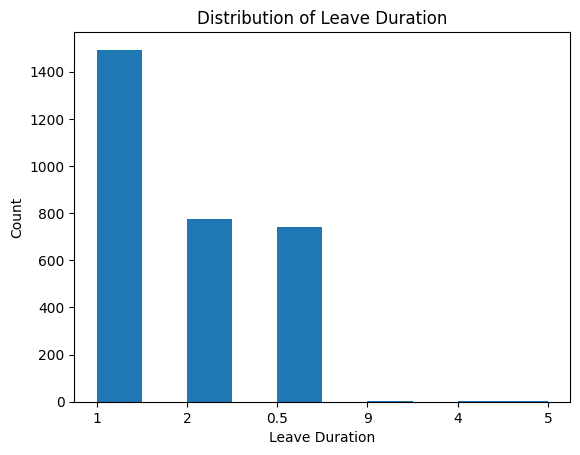

In [71]:

plt.hist(df['leave_duration'])
plt.xlabel('Leave Duration')
plt.ylabel('Count')
plt.title('Distribution of Leave Duration')
plt.show()


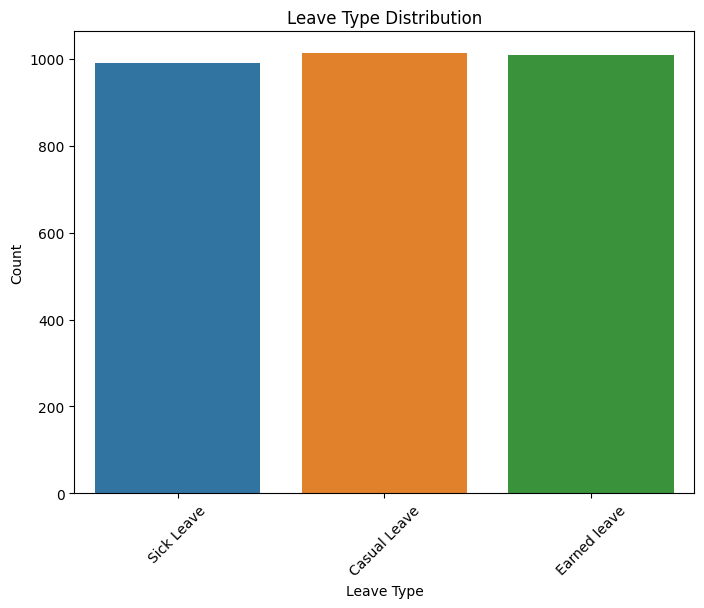

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='leave_type')
plt.xlabel('Leave Type')
plt.ylabel('Count')
plt.title('Leave Type Distribution')
plt.xticks(rotation=45)
plt.show()

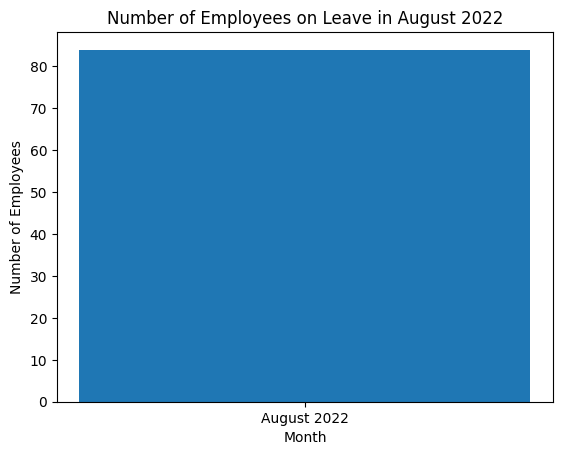

In [ ]:
df.loc[:, 'leave_dates'] = pd.to_datetime(df['leave_dates'])

# Filter the data for the month of August 2022
august_leave = df[(df['leave_dates'].dt.month == 8) & (df['leave_dates'].dt.year == 2022)]

# Count the number of employees on leave in August 2022
leave_count = august_leave['employee_name'].nunique()

# Create the bar chart
plt.bar('August 2022', leave_count)
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.title('Number of Employees on Leave in August 2022')
plt.show()


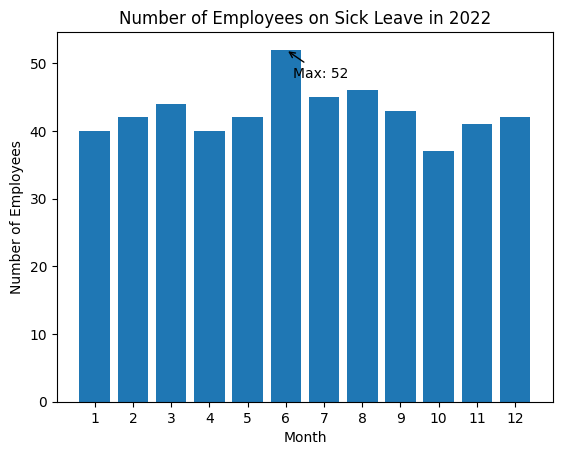

In [ ]:
df.loc[:, 'leave_dates'] = pd.to_datetime(df['leave_dates'])

# Filter the data for the year 2022 and leave type 'Sick Leave'
sick_leave_2022 = df[(df['leave_dates'].dt.year == 2022) & (df['leave_type'] == 'Sick Leave')]

# Group the data by month and count the number of unique employees on sick leave in each month
sick_leave_count = sick_leave_2022.groupby(sick_leave_2022['leave_dates'].dt.month)['employee_name'].nunique()

# Find the month with the maximum count
max_leave_month = sick_leave_count.idxmax()

# Create the bar chart
plt.bar(sick_leave_count.index, sick_leave_count.values)
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.title('Number of Employees on Sick Leave in 2022')
plt.xticks(sick_leave_count.index)
plt.annotate(f'Max: {sick_leave_count[max_leave_month]}', (max_leave_month, sick_leave_count[max_leave_month]), 
             xytext=(5, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.show()

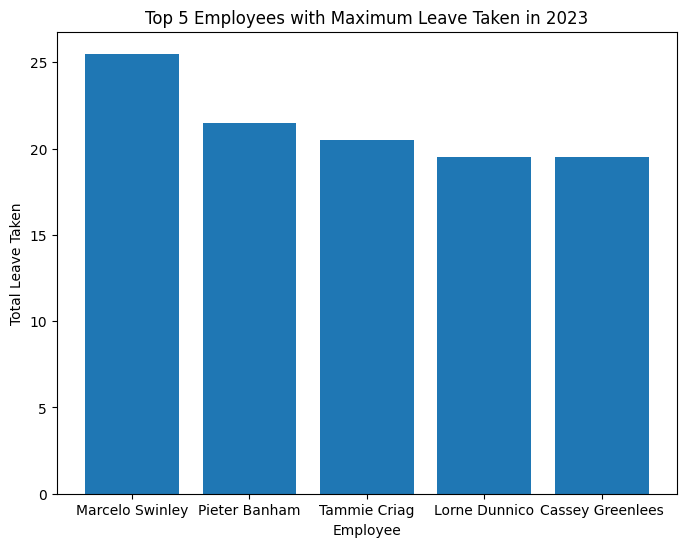

In [ ]:
df.loc[:,'leave_dates'] = pd.to_datetime(df['leave_dates'])

# Filter the data for the year 2023
leave_2023 = df[df['leave_dates'].dt.year == 2023]

# Group the data by employee and calculate the total leave taken
employee_leave = leave_2023.groupby('employee_name')['leave_duration'].sum()

# Sort the employees based on leave taken in descending order
employee_leave_sorted = employee_leave.sort_values(ascending=False)

# Get the top 5 employees with the maximum leave taken
top_5_employees = employee_leave_sorted.head(5)

# Create the bar chart
plt.figure(figsize=(8, 6))

plt.bar(top_5_employees.index, top_5_employees.values)
plt.xlabel('Employee')
plt.ylabel('Total Leave Taken')
plt.title('Top 5 Employees with Maximum Leave Taken in 2023')

plt.show()

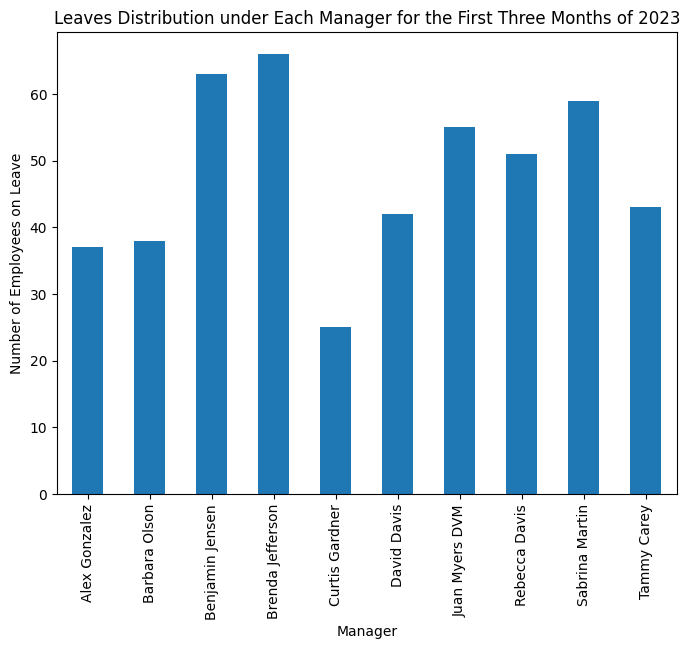

In [ ]:
df.loc[:,'leave_dates'] = pd.to_datetime(df['leave_dates'])

# Filter the data for the first three months of 2023
leave_2023_first_three_months = df[(df['leave_dates'].dt.year == 2023) & (df['leave_dates'].dt.month <= 3)]

# Group the data by manager and count the number of employees on leave under each manager
leave_distribution = leave_2023_first_three_months.groupby('manager_name')['employee_name'].count()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart
leave_distribution.plot(kind='bar')
plt.xlabel('Manager')
plt.ylabel('Number of Employees on Leave')
plt.title('Leaves Distribution under Each Manager for the First Three Months of 2023')

plt.show()

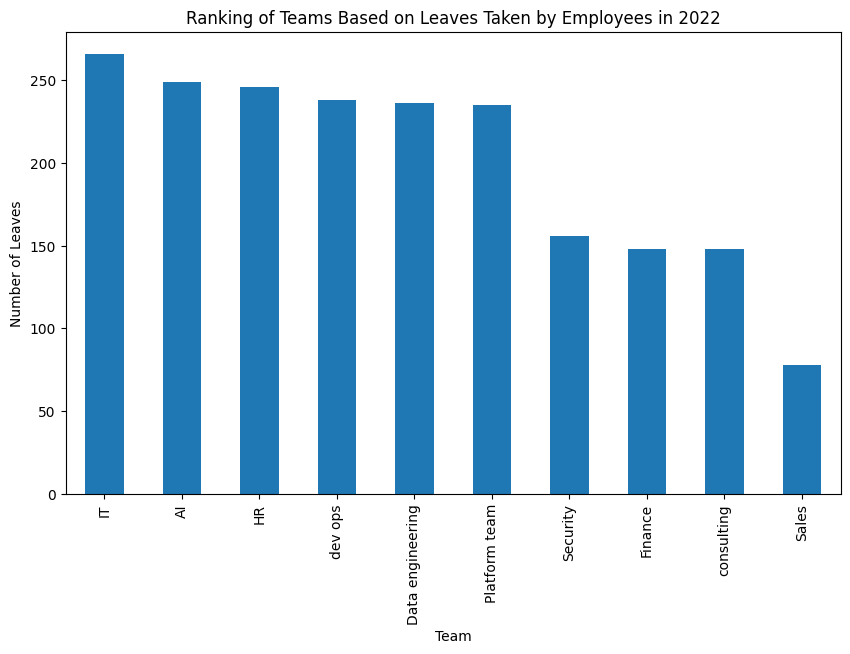

In [ ]:
leave_2022 = df[df['leave_dates'].dt.year == 2022]

# Group the data by team and count the number of leaves taken by employees in each team
team_leave_count = leave_2022.groupby('team_name')['employee_name'].count()

# Rank the teams based on the leave count in descending order
ranked_teams = team_leave_count.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
ranked_teams.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Leaves')
plt.title('Ranking of Teams Based on Leaves Taken by Employees in 2022')

plt.show()

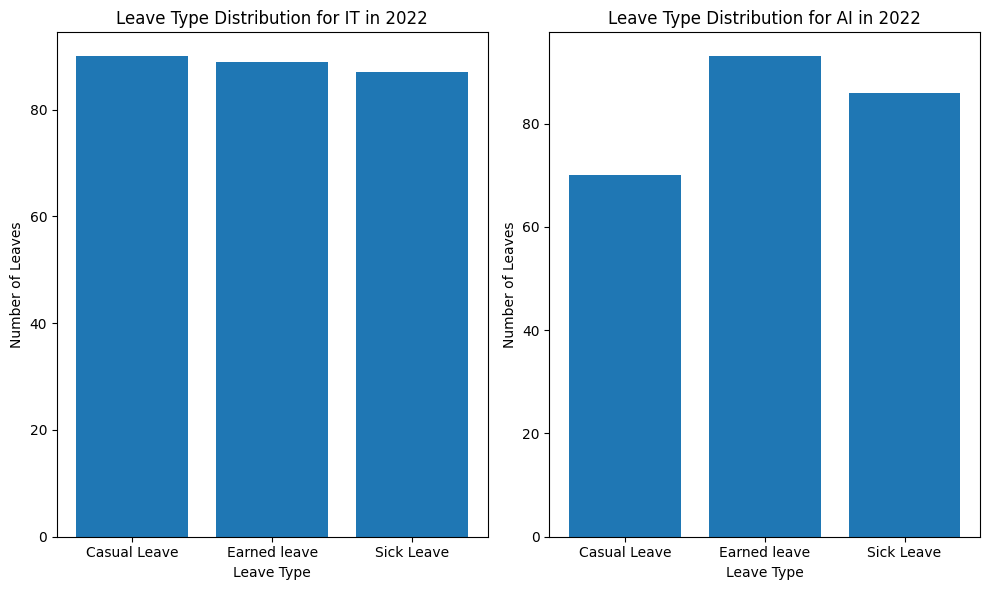

In [ ]:
# Filter the data for the year 2022
leave_2022 = df[df['leave_dates'].dt.year == 2022]

# Group the data by team and leave type, and calculate the count
team_leave_counts = leave_2022.groupby(['team_name', 'leave_type'])['employee_name'].count()

# Reset the index to convert the grouped data into a DataFrame
team_leave_counts = team_leave_counts.reset_index()

# Sort the teams based on total leave count in descending order
team_leave_counts_sorted = team_leave_counts.groupby('team_name')['employee_name'].sum().sort_values(ascending=False)

# Select the top 2 teams
top_teams = team_leave_counts_sorted.head(2).index

# Filter the leave counts for the top 2 teams
top_teams_leave_counts = team_leave_counts[team_leave_counts['team_name'].isin(top_teams)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create separate subplots for each team
for i, team in enumerate(top_teams):
    team_leave_counts_team = top_teams_leave_counts[top_teams_leave_counts['team_name'] == team]
    plt.subplot(1, 2, i+1)
    plt.bar(team_leave_counts_team['leave_type'], team_leave_counts_team['employee_name'])
    plt.xlabel('Leave Type')
    plt.ylabel('Number of Leaves')
    plt.title(f'Leave Type Distribution for {team} in 2022')

plt.tight_layout()
plt.show()